In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import gzip

In [5]:

workstation=0  #[0=local/github, 162,163]
year=2018

imagedir = 'JD-2018data/image-output/'

if workstation==162:
    %cd '/home/jdavidson/bees_sharedcodes/Bees_sharedcodes/'
elif workstation==163:
    %cd '/sharedcodes/bees/code/'    
else:
    None # for github/local, working directory is this one

import definitions_2018 as bd
if workstation==162:
    resultsdir = '/home/jdavidson/bees_data/beeresults/'
    comb_contents_dir = '/home/jdavidson/bees_data/comb-contents-images/'
elif workstation==163:
    resultsdir = '/data/beeresults/'
    comb_contents_dir = '/data/comb-contents-images/'
elif workstation==0:
    resultsdir = 'data2018/'
    comb_contents_dir = 'comb-contents2018/'     
zfilln = 2 # for file names
    
import displayfunctions as bp  # 'bee plots'
import datafunctions as dfunc
dfunc.init(bd) 
bp.init(bd)
bd.year

/home/jdavidson/bees_sharedcodes/Bees_sharedcodes


2018

# Comb substrates - plot for different days

In [6]:
_,hull = pickle.load(gzip.open(comb_contents_dir+'combined_dancefloor.pklz','rb'))
hull_vertices = [hull.points[hull.vertices,0],hull.points[hull.vertices,1]]

In [7]:
## Load just comb when measurements were taken

# allcomb = [dfunc.day_comb_data(comb_contents_dir,bd.alldaytimestamps[daynum]) for daynum in bd.comb_daynums]
# faster way to load - use the pickle files
allcomb = [pickle.load(gzip.open(comb_contents_dir+'comb_'+str(daynum).zfill(zfilln)+'.pklz','rb')) for daynum in bd.comb_daynums]

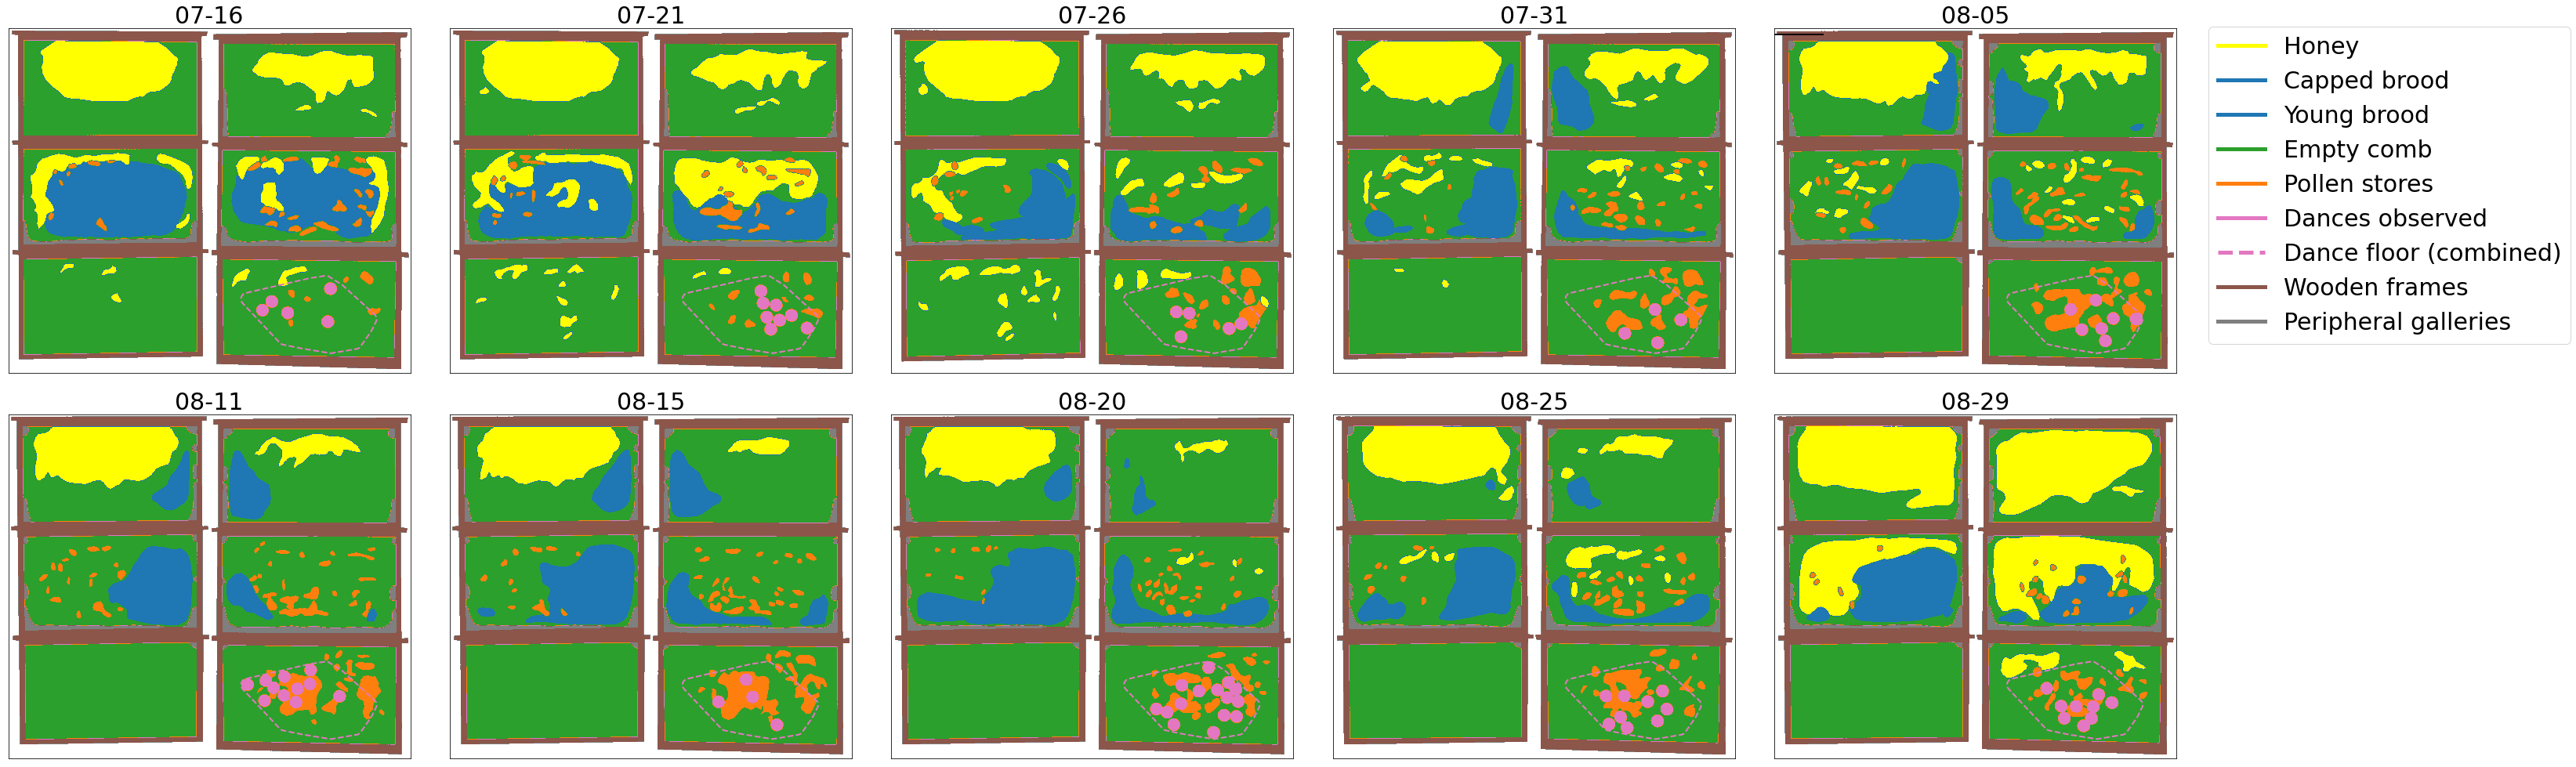

In [8]:
# plot all comb measurements along a line
f,ax = plt.subplots(2,5,sharex=True,sharey=True)
basesize=10
fontsize=basesize*3
f.set_size_inches(basesize*ax.shape[1],basesize*ax.shape[0]*(bd.ypixels/(2*bd.xpixels)))

for i in range(len(bd.comb_daynums)-3):
    day = bd.alldaytimestamps[bd.comb_daynums[i]]
    a = ax[np.floor(i/ax.shape[1]).astype(int),np.mod(i,ax.shape[1])]
    bp.showcomb(allcomb[i],ax=a)
    a.plot(bd.xpixels+hull_vertices[1], hull_vertices[0], linestyle='--',c=bd.cmap_comb(5), lw=2)
    a.set_title(bp.showmonthday(day),fontsize=fontsize)
plt.subplots_adjust(wspace=0.05,hspace=0.12)

# legend hack
a = ax[0,-1]
for i in range(len(bd.substrate_names)-2):
    if i==5:  # dance floor
        a.plot(0,0,label='Dances observed',c=bd.cmap_comb(i),lw=5)
        a.plot(0,0,label='Dance floor (combined)',linestyle='--',lw=5,c=bd.cmap_comb(i))        
    else:
        a.plot(0,0,label=bd.substrate_names[i],c=bd.cmap_comb(i),lw=5)
a.legend(fontsize=fontsize,bbox_to_anchor=(1.05, 1.04))
linelength=10 # in cm
a.plot([0,0+linelength*bd.pixels_per_cm],[100,100],linewidth=2,color='k')
# plt.savefig(imagedir+'allcombimages.png')
# plt.savefig(imagedir+'allcombimages.pdf')
plt.show()
